In [ ]:
# Download Kaggle package and dataset
!pip install kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d gpiosenka/100-bird-species

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          10398        315  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           5826        180  0.9705882        
mohamedharris/supermart-grocery-sales-retail-analytics-dataset  Supermart Grocery Sales - Retail Analytics Dataset  191KB  2022-06-12 16:14:44            882         44  0.88235295       
sameepvani/nasa-nearest-ea

In [ ]:
# Download relative packages
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from keras.layers import Rescaling, Dropout, BatchNormalization, Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

print('tensorflow version: ', tf.__version__)

tensorflow version:  2.8.2


In [ ]:
# unzip downloading dataset
!unzip -nq 100-bird-species.zip -d dataset

In [ ]:
# Setting Data Path
BASE_DIR = os.getcwd() + '/dataset'
print('BASE_DIR: ', os.listdir(BASE_DIR))
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALID_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR = os.path.join(BASE_DIR, 'test')

BASE_DIR:  ['birds.csv', 'EfficientNetB4-BIRDS-0.99.h5', 'test', 'valid', 'birds latin names.csv', 'class_dict.csv', 'images to test', 'my_csv-2-17-2022-1-17-48.csv', 'train']


In [ ]:
# Get all class name and its length
CATEGORIES = sorted(os.listdir(TRAIN_DIR))
category_count = len(CATEGORIES)
print('toatl categories: ', category_count)
print('CATEGORIES: ', CATEGORIES)

toatl categories:  400
CATEGORIES:  ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'AVADAVAT', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAND TAILED GUAN', 'BANDED BROADBILL', 'BANDED PITA', 'BANDED STILT', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BARROWS GOLDENEYE', 'BAY-BREASTED WARBLER'

Image shape is:  (224, 224, 3)


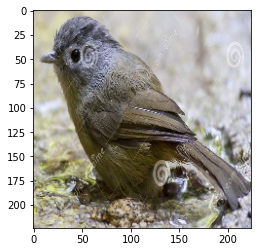

In [ ]:
# Test loading iamge and analysis image shape
one_mpimg = mpimg.imread(os.path.join(TRAIN_DIR, CATEGORIES[0], '001.jpg'))
IMG_SHAPE = one_mpimg.shape
plt.imshow(one_mpimg)
print('Image shape is: ', one_mpimg.shape)

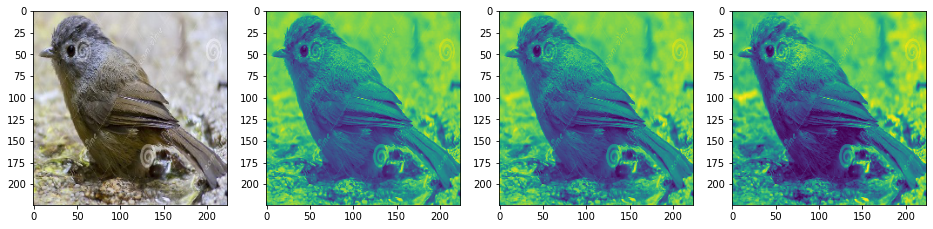

In [ ]:
# Try to print rgb image seperately

fig, axes = plt.subplots(1, 4, figsize=(16,4))
axes[0].imshow(one_mpimg)
axes[1].imshow(one_mpimg[:,:,0])
axes[2].imshow(one_mpimg[:,:,1])
axes[3].imshow(one_mpimg[:,:,2])
plt.show()

Image Shape:  (224, 224, 3)


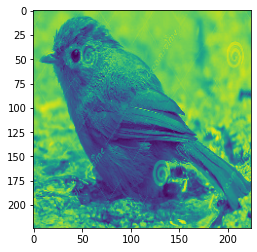

In [ ]:
# Convert RGB to Gray
one_gray_mpimg = tf.image.rgb_to_grayscale(one_mpimg)
# IMG_SHAPE = one_gray_mpimg.shape
plt.imshow(tf.squeeze(one_gray_mpimg))
print("Image Shape: ", IMG_SHAPE)

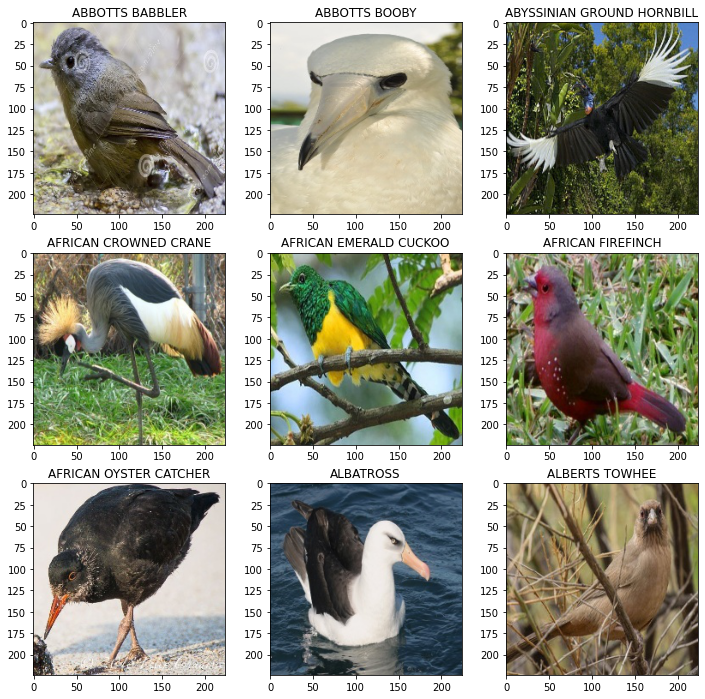

In [ ]:
# Try to print more than one image at once

fig, axes = plt.subplots(3, 3, figsize=(12,12))
for i, dirname in enumerate(CATEGORIES[:9]):
    ax = axes[i//3, i%3]
    one_img_path = os.path.join(TRAIN_DIR, dirname, '001.jpg')
    img = mpimg.imread(one_img_path)
    ax.imshow(img)
    ax.set_title('{}'.format(dirname))
plt.show()

In [ ]:
# Global Setting
BATCH_SIZE = 32
IMG_HEIGHT = IMG_SHAPE[0]
IMG_WIDTH = IMG_SHAPE[1]

In [ ]:
# Preprocessing Image Data

# Training data
train_dataset = keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=123,
    batch_size = BATCH_SIZE)
class_names = train_dataset.class_names
# train_dataset = train_dataset.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))
print(train_dataset)
train_groups = len(train_dataset)
# print(train_dataset)
# train_dataset.
# tf.rgb_to_grayscale(train_dataset)

# Validating data
valid_dataset = keras.utils.image_dataset_from_directory(
    VALID_DIR,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=123,
    batch_size = BATCH_SIZE)
# valid_dataset = valid_dataset.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))
print(valid_dataset)
valid_groups = len(valid_dataset)

# Testing data
test_dataset = keras.utils.image_dataset_from_directory(
    TEST_DIR,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=123,
    batch_size = BATCH_SIZE)
# test_dataset = test_dataset.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))
print(test_dataset)
test_groups = len(test_dataset)

print(class_names)

Found 58388 files belonging to 400 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 400), dtype=tf.float32, name=None))>
Found 2000 files belonging to 400 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 400), dtype=tf.float32, name=None))>
Found 2000 files belonging to 400 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 400), dtype=tf.float32, name=None))>
['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 

In [ ]:
# Display the shape of the batch of the image and label
for image_batch, label_batch in train_dataset:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 224, 224, 3)
(32, 400)


In [ ]:
# For buffer prefetching
# Dataset.cache will keep the images in memory after first epoch
# Dataset.prefetch overlaps data preprocessing and model execution while training
# AUTOTUNE = tf.data.AUTOTUNE
# train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
# valid_dataset = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Model generator
def create_model():
  # Build Model
  model = keras.Sequential([
      # Input
      Input(IMG_SHAPE),
      
      # Standardize the data
      Rescaling(1./255),

      # CNN
      Conv2D(256, (3,3), activation='relu'),
      MaxPooling2D(pool_size=2),
      BatchNormalization(),    

      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(pool_size=2),
      BatchNormalization(),    

      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(pool_size=2),
      BatchNormalization(),

      Conv2D(32, (3,3), activation='relu'),
      MaxPooling2D(pool_size=2),
      BatchNormalization(),

      Conv2D(16, (3,3), activation='relu'),
      BatchNormalization(),

      # Output
      Flatten(),
      Dropout(0.2),
      BatchNormalization(),
      Dense(1600, activation='relu'),
      BatchNormalization(),
      Dense(800, activation='relu'),
      BatchNormalization(),
      Dense(category_count),
      Activation('softmax')
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 256)    1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0

In [ ]:
print(train_dataset)
print(train_groups)

print(valid_dataset)
print(valid_groups)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 400), dtype=tf.float32, name=None))>
1825
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 400), dtype=tf.float32, name=None))>
63


In [ ]:
# Training Setting
EPOCHES = 10
EARLY_STOPPING = keras.callbacks.EarlyStopping(monitor='val_loss',
                          patience=2, # Stop if after two epochs with no improvement
                          restore_best_weights=True) 
checkpoint_path = "/content/drive/MyDrive/bird400/cp.ckpt"
MODEL_CHECKPOINT = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                              save_best_only=True,
                              save_weights_only=True,
                              verbose=1)

In [ ]:
# Training
history = model.fit(train_dataset,
                    steps_per_epoch = train_groups,
                    epochs = EPOCHES,
                    validation_data = valid_dataset,
                    validation_steps = valid_groups)

Epoch 1/10
1825/1825 [==============================] - 493s 262ms/step - loss: 3.8679 - accuracy: 0.2215 - val_loss: 2.3461 - val_accuracy: 0.4490
Epoch 2/10
1825/1825 [==============================] - 474s 260ms/step - loss: 2.3720 - accuracy: 0.4496 - val_loss: 1.6300 - val_accuracy: 0.6025
Epoch 3/10
1825/1825 [==============================] - 473s 259ms/step - loss: 1.7883 - accuracy: 0.5624 - val_loss: 1.3983 - val_accuracy: 0.6575
Epoch 4/10
1825/1825 [==============================] - 473s 259ms/step - loss: 1.3761 - accuracy: 0.6477 - val_loss: 1.3130 - val_accuracy: 0.6720
Epoch 5/10
1825/1825 [==============================] - 472s 259ms/step - loss: 1.0769 - accuracy: 0.7124 - val_loss: 1.3780 - val_accuracy: 0.6795
Epoch 6/10
1825/1825 [==============================] - 472s 259ms/step - loss: 0.8344 - accuracy: 0.7679 - val_loss: 1.3683 - val_accuracy: 0.6840
Epoch 7/10
1825/1825 [==============================] - 473s 259ms/step - loss: 0.6696 - accuracy: 0.8060 - val_

In [ ]:
# Test accuracy
results = model.evaluate(test_dataset)
print("Accuracy: %.2f%%" % (results[1]*100))

63/63 [==============================] - 5s 68ms/step - loss: 1.1767 - accuracy: 0.7595
Accuracy: 75.95%


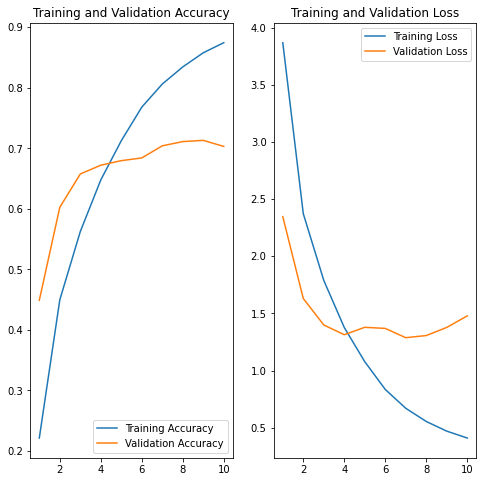

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1,11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()